     CONTACTS GM_CODE                         GM_NAAM  H2O   OAD  STED  \
0      101268  GM0518                   's-Gravenhage  NEE  4856     1   
1       21262  GM0796                's-Hertogenbosch  NEE  1963     2   
2         471  GM1680                     Aa en Hunze  NEE   279     5   
3           0  GM0738                         Aalburg  NEE   380     5   
4         657  GM0358                        Aalsmeer  NEE   904     4   
5           0  GM0197                          Aalten  NEE   782     4   
6        1937  GM0059                   Achtkarspelen  NEE   426     5   
7         670  GM0482                    Alblasserdam  NEE  1503     2   
8         786  GM0613                   Albrandswaard  NEE  1022     3   
9           0  GM0361                         Alkmaar  NEE  2243     2   
10       3754  GM0141                          Almelo  NEE  1569     2   
11      22443  GM0034                          Almere  NEE  1584     2   
12       3248  GM0484             Alph

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x000001AB9E4D0700> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid vmin or vmax

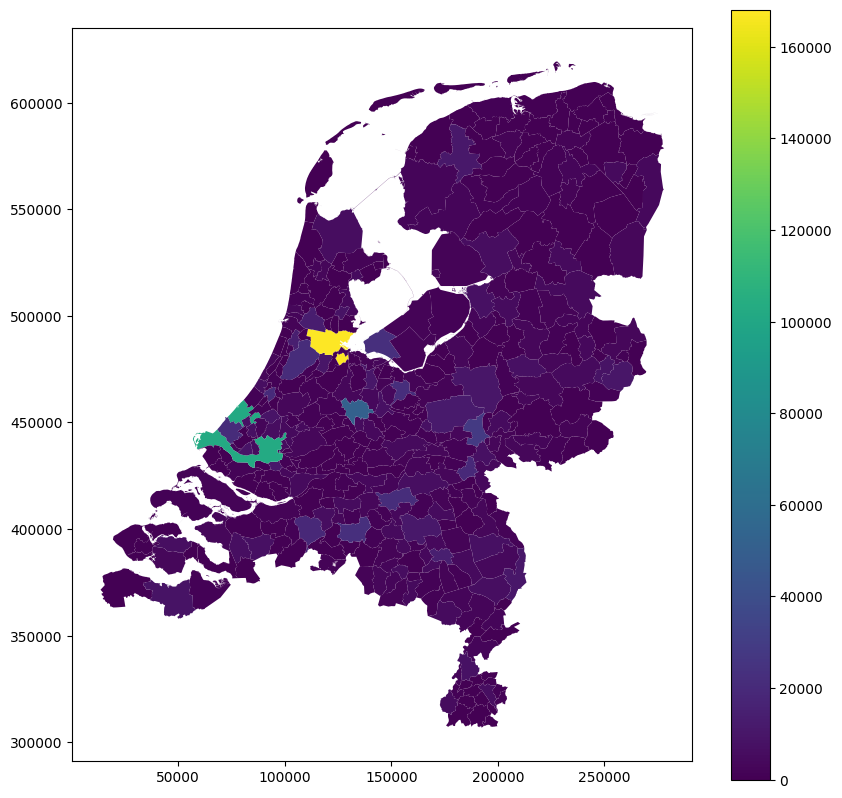

ValueError: Invalid vmin or vmax

<Figure size 640x480 with 2 Axes>

In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_4'
contact_data = np.load(path + '/Runs_ref_3_3_5/Contacts.npy')
contact_data_per_municipality = np.sum(contact_data, axis=1)

mapdf = gpd.read_file('Data/NL-geomap/gemeente_2018_v3.shp')
mapdf = mapdf[mapdf["H2O"] == "NEE"]
mapdf.sort_values("GM_NAAM", inplace=True)
mapdf = mapdf.reset_index(drop=True)

mapdf.insert(0, 'CONTACTS', contact_data_per_municipality)
#pd.set_option('display.max_rows', None)
print(mapdf)

mapdf.plot(column="CONTACTS", figsize=(10,10), legend=True)